## Data

In [1]:
from data import *

# dirs
imgs_dir = "Kvasir-SEG/images/*.jpg"
masks_dir = "Kvasir-SEG/masks/*.jpg"

dataloader_train, dataloader_test, dataloader_val = get_data(imgs_dir, masks_dir, resize=352, batch_size=12)

## Model

In [2]:
# check device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
from model import *
model = HarDMSEG().cuda()

In [4]:
from torchsummary import summary

In [5]:
summary(model, (3, 352, 352))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 176, 176]             864
       BatchNorm2d-2         [-1, 32, 176, 176]              64
             ReLU6-3         [-1, 32, 176, 176]               0
            Conv2d-4         [-1, 64, 176, 176]          18,432
       BatchNorm2d-5         [-1, 64, 176, 176]             128
             ReLU6-6         [-1, 64, 176, 176]               0
         MaxPool2d-7           [-1, 64, 88, 88]               0
            Conv2d-8           [-1, 14, 88, 88]           8,064
       BatchNorm2d-9           [-1, 14, 88, 88]              28
            ReLU6-10           [-1, 14, 88, 88]               0
           Conv2d-11           [-1, 24, 88, 88]          16,848
      BatchNorm2d-12           [-1, 24, 88, 88]              48
            ReLU6-13           [-1, 24, 88, 88]               0
           Conv2d-14           [-1, 14,

## Train

In [6]:
from train import train

Device: cuda:0


In [7]:
train_loss, train_precision, train_recall, train_dice, val_loss, val_precision, val_recall, val_dice = train(model, dataloader_train, dataloader_val,batchsize=12, epochs_num=300)

  0%|▎                                                                               | 1/300 [00:58<4:53:08, 58.82s/it]

---------------
Epoch: 0
TRAIN: Loss: 0.924, Precision: 0.719, Recall: 0.855, mDice: 0.772
VAL: Loss: 0.897, Precision: 0.757, Recall: 0.785, mDice: 0.758
---------------


  7%|█████▌                                                                         | 21/300 [20:51<4:37:49, 59.75s/it]

---------------
Epoch: 20
TRAIN: Loss: 0.238, Precision: 0.951, Recall: 0.946, mDice: 0.948
VAL: Loss: 0.455, Precision: 0.911, Recall: 0.824, mDice: 0.86
---------------


 14%|██████████▊                                                                    | 41/300 [40:47<4:18:22, 59.86s/it]

---------------
Epoch: 40
TRAIN: Loss: 0.196, Precision: 0.962, Recall: 0.962, mDice: 0.962
VAL: Loss: 0.458, Precision: 0.894, Recall: 0.836, mDice: 0.856
---------------


 20%|███████████████▋                                                             | 61/300 [1:00:45<3:58:54, 59.98s/it]

---------------
Epoch: 60
TRAIN: Loss: 0.191, Precision: 0.964, Recall: 0.966, mDice: 0.965
VAL: Loss: 0.454, Precision: 0.896, Recall: 0.836, mDice: 0.858
---------------


 27%|████████████████████▊                                                        | 81/300 [1:20:44<3:38:59, 60.00s/it]

---------------
Epoch: 80
TRAIN: Loss: 0.197, Precision: 0.964, Recall: 0.964, mDice: 0.964
VAL: Loss: 0.46, Precision: 0.893, Recall: 0.838, mDice: 0.857
---------------


 34%|█████████████████████████▌                                                  | 101/300 [1:40:40<3:18:23, 59.81s/it]

---------------
Epoch: 100
TRAIN: Loss: 0.192, Precision: 0.965, Recall: 0.965, mDice: 0.965
VAL: Loss: 0.452, Precision: 0.91, Recall: 0.826, mDice: 0.859
---------------


 40%|██████████████████████████████▋                                             | 121/300 [2:00:38<2:59:02, 60.01s/it]

---------------
Epoch: 120
TRAIN: Loss: 0.193, Precision: 0.962, Recall: 0.968, mDice: 0.965
VAL: Loss: 0.464, Precision: 0.886, Recall: 0.844, mDice: 0.857
---------------


 47%|███████████████████████████████████▋                                        | 141/300 [2:20:36<2:38:40, 59.88s/it]

---------------
Epoch: 140
TRAIN: Loss: 0.194, Precision: 0.964, Recall: 0.964, mDice: 0.964
VAL: Loss: 0.461, Precision: 0.894, Recall: 0.832, mDice: 0.854
---------------


 54%|████████████████████████████████████████▊                                   | 161/300 [2:40:33<2:18:54, 59.96s/it]

---------------
Epoch: 160
TRAIN: Loss: 0.192, Precision: 0.961, Recall: 0.967, mDice: 0.964
VAL: Loss: 0.463, Precision: 0.887, Recall: 0.841, mDice: 0.856
---------------


 60%|█████████████████████████████████████████████▊                              | 181/300 [3:00:32<1:58:53, 59.94s/it]

---------------
Epoch: 180
TRAIN: Loss: 0.198, Precision: 0.96, Recall: 0.963, mDice: 0.962
VAL: Loss: 0.45, Precision: 0.904, Recall: 0.831, mDice: 0.859
---------------


 67%|██████████████████████████████████████████████████▉                         | 201/300 [3:20:28<1:38:38, 59.78s/it]

---------------
Epoch: 200
TRAIN: Loss: 0.188, Precision: 0.966, Recall: 0.965, mDice: 0.965
VAL: Loss: 0.456, Precision: 0.901, Recall: 0.834, mDice: 0.858
---------------


 74%|███████████████████████████████████████████████████████▉                    | 221/300 [3:40:25<1:18:51, 59.89s/it]

---------------
Epoch: 220
TRAIN: Loss: 0.188, Precision: 0.968, Recall: 0.963, mDice: 0.965
VAL: Loss: 0.452, Precision: 0.899, Recall: 0.833, mDice: 0.857
---------------


 80%|██████████████████████████████████████████████████████████████▋               | 241/300 [4:00:22<58:47, 59.79s/it]

---------------
Epoch: 240
TRAIN: Loss: 0.196, Precision: 0.96, Recall: 0.966, mDice: 0.963
VAL: Loss: 0.456, Precision: 0.897, Recall: 0.834, mDice: 0.857
---------------


 87%|███████████████████████████████████████████████████████████████████▊          | 261/300 [4:20:18<38:54, 59.86s/it]

---------------
Epoch: 260
TRAIN: Loss: 0.189, Precision: 0.965, Recall: 0.966, mDice: 0.966
VAL: Loss: 0.461, Precision: 0.896, Recall: 0.833, mDice: 0.856
---------------


 94%|█████████████████████████████████████████████████████████████████████████     | 281/300 [4:40:14<18:57, 59.89s/it]

---------------
Epoch: 280
TRAIN: Loss: 0.192, Precision: 0.965, Recall: 0.965, mDice: 0.965
VAL: Loss: 0.453, Precision: 0.903, Recall: 0.83, mDice: 0.858
---------------


100%|██████████████████████████████████████████████████████████████████████████████| 300/300 [4:59:13<00:00, 59.85s/it]


## Test HardNetMSEG

In [1]:
from test import *
from data import *

In [2]:
# dirs
imgs_dir = "Kvasir-SEG/images/*.jpg"
masks_dir = "Kvasir-SEG/masks/*.jpg"

dataloader_train, dataloader_test, dataloader_val = get_data(imgs_dir, masks_dir, resize=352, batch_size=12)

In [10]:
get_test_score(dataloader_test, "HardNetMSEG.pth", batchsize=1)

100it [00:07, 14.18it/s]

TEST: Loss: 0.389, Precision: 0.921, Recall: 0.87, mDice: 0.88


## Predict

In [1]:
from predict_viz import *
import glob

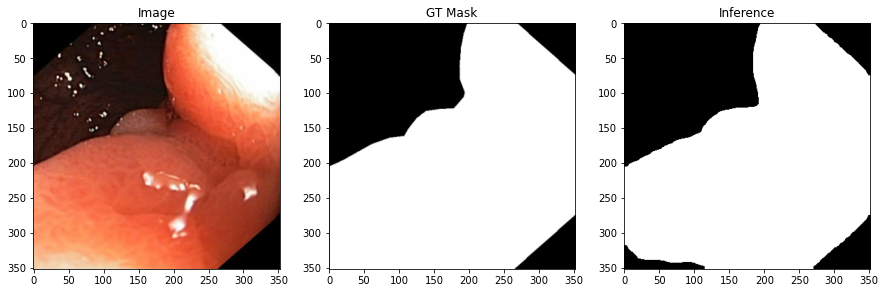

0.6622476577758789
Wall time: 3.88 s


In [2]:
%%time
img_num = 42


img_dir = "Kvasir-SEG/images/*.jpg"
mask_dir = "Kvasir-SEG/masks/*.jpg"
img_path = glob.glob(img_dir)[img_num]
mask_path = glob.glob(mask_dir)[img_num]

pred_time = pred_and_viz(img_path, mask_path, model_path='HardNetMSEG.pth', resize=352)
print(pred_time)